In [1]:
#Import the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load the data
ACME_data = pd.read_csv("ACME-HappinessSurvey2020.csv")



# EDA and  dataset analysis 

In [3]:
#view the first rows
ACME_data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [4]:
#summary statistics- numerical features
ACME_data.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


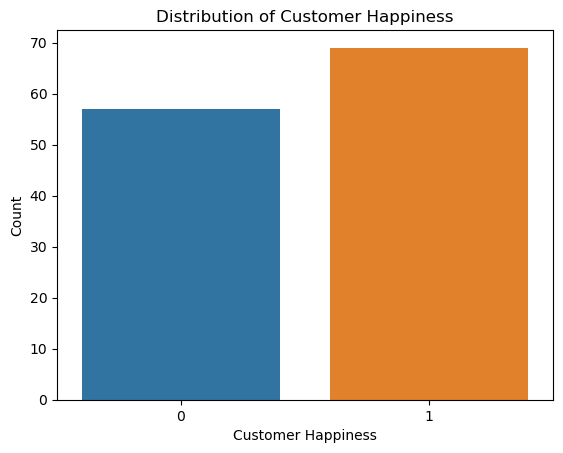

In [5]:
# distribution of the target variable
sns.countplot(x='Y', data=ACME_data)
plt.xlabel('Customer Happiness')
plt.ylabel('Count')
plt.title('Distribution of Customer Happiness')
plt.show()


#the happy customers have the highest distribution

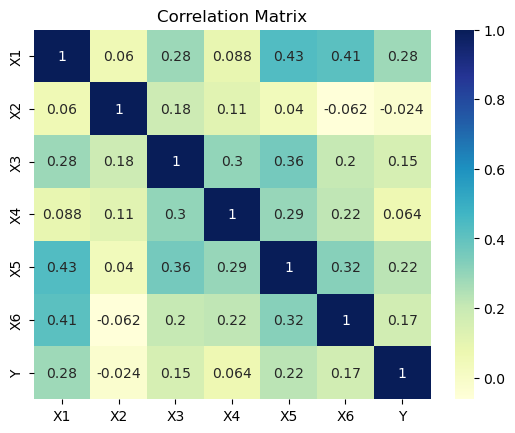

In [6]:
# correlations between features
columns=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y']
corr_matrix = ACME_data[columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

X2 is negatively correlated to Y and X6.

X1 and X4 has the highest correlation of 0.88

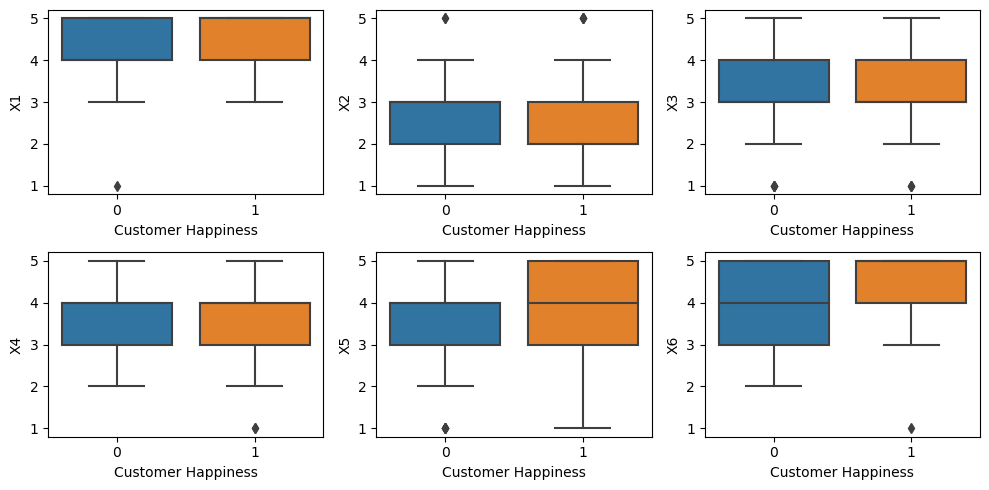

In [7]:
#relationship between each feature and the target variable
plt.figure(figsize=(10, 5))
for i, feature in enumerate(['X1', 'X2', 'X3', 'X4', 'X5', 'X6']):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Y', y=feature, data=ACME_data)
    plt.xlabel('Customer Happiness')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


# Data Processing

In [8]:
# Input features
X = ACME_data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']]  


# Target variable
Y =  ACME_data['Y']  

In [16]:
#  training and validation/test sets splits
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)



# Train  Model and Evalute the Model


In [10]:
#classification model
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [25]:
#evaluate
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

Y_pred = model.predict(X_val)
accuracy = accuracy_score(Y_val, Y_pred)

# Calculate confusion matrix
cm = confusion_matrix(Y_val, Y_pred)

# Extract values from confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate accuracy
accuracy = accuracy_score(Y_val, Y_pred)

# Calculate precision
precision = precision_score(Y_val, Y_pred)

# Calculate recall
recall = recall_score(Y_val, Y_pred)

# Calculate F1-score
f1 = f1_score(Y_val, Y_pred)

# Print the metrics
print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Confusion Matrix:
[[ 5 10]
 [ 4  7]]
Accuracy: 0.46153846153846156
Precision: 0.4117647058823529
Recall: 0.6363636363636364
F1-score: 0.5


True Positive (TP): The model correctly predicted 7 instances of the positive class (happy customers) as positive. False Positive (FP): The model incorrectly predicted 10 instances of the negative class (unhappy customers) as positive. False Negative (FN): The model incorrectly predicted 4 instances of the positive class as negative. True Negative (TN): The model correctly predicted 5 instances of the negative class as negative.

Accuracy- The model achieved an accuracy of 0.4615, indicating that it correctly classified 46.15% of the instances.

Precision:  A precision of 0.4118 means that out of all instances predicted as happy customers, only 41.18% were actually happy customers.

Recall also known as  true positive rate, measures the proportion of correctly predicted positive instances out of all actual positive instances. 
      The model captured 63.64% of the actual happy customers.

F1-score is the  mean of precision and recall, providing a balanced measure of the model's performance. 
 0.5000 suggests a moderate balance between precision and recall.

# Feature selection and model training on selected features

In [28]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(score_func=chi2, k=2)
X_train_selected = selector.fit_transform(X_train, Y_train)
selected_features = X.columns[selector.get_support(indices=True)]

print("Selected Features:", selected_features)

Selected Features: Index(['X1', 'X5'], dtype='object')


In [29]:
#Train a model on the selected features
model = LogisticRegression()
model.fit(X_train_selected, Y_train)

LogisticRegression()

In [30]:
#Evaluate the model
X_val_selected = selector.fit_transform(X_val,Y_val)
accuracy = model.score(X_val_selected, Y_val)
print("Accuracy on val set:", accuracy)

Accuracy on val set: 0.7307692307692307


Model accuracy increased after feature selection after using two features